In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
non_categorical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
scaler = StandardScaler()
df[non_categorical_features] = scaler.fit_transform(df[non_categorical_features])

In [14]:
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

label_encoders = {}

for col in categorical_features:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder



In [15]:
file_name = "heart_data_processed.csv"
df.to_csv(file_name, index=False)

print(f"Processed data saved as {file_name}")



Processed data saved as heart_data_processed.csv


In [16]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [18]:
accuracy_score(y_test,knn.predict(X_test))

0.842391304347826

In [19]:
k_values = range(1, 50,2)


In [20]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

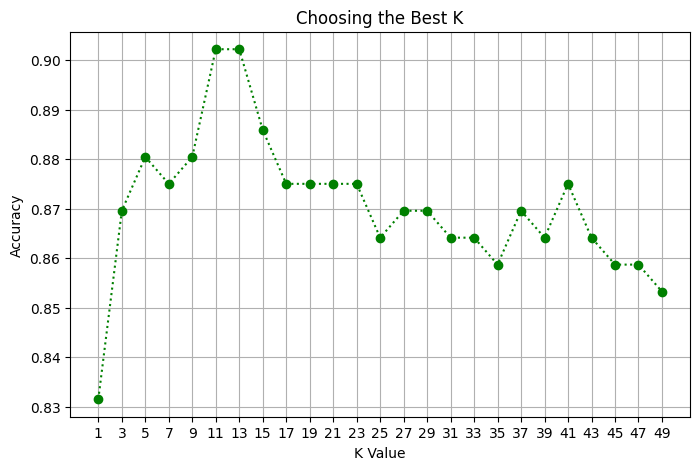

Best K: 11


<Figure size 640x480 with 0 Axes>

In [24]:
# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dotted', color='g')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()
# Find best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")

In [29]:
# Since 7,9 give the best accuracy we will use k=7 or 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
accuracy_score(y_test,knn.predict(X_test))

0.8804347826086957

In [31]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       100
           1       0.84      0.83      0.84        84

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



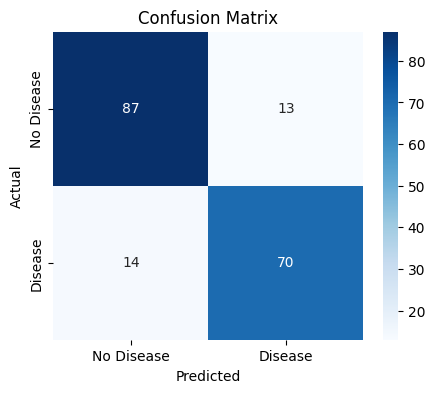

In [32]:
# Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(CM, annot=True, fmt='d', cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

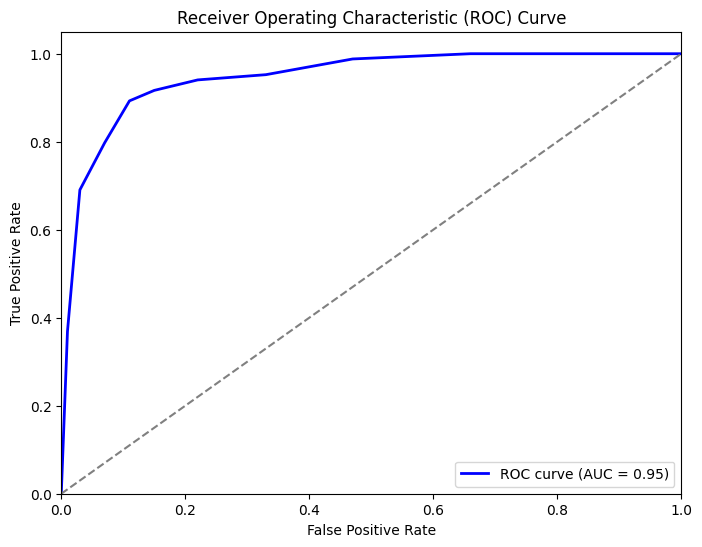

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()